Paul O'Leary 

Comp 4449 Capstone

11/19/2021

With Leigh Ann Kudloff

# "Suspense at the Preserve!"

## Final Visualization Notebook

PJO_Final_Visualizations.ipynb notebook contains the final visualizations used in the presentation and in the report.  

In [1]:
# This same package import section was carried through all notebooks.  

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import timeit
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report

from pydub import AudioSegment
from scipy import signal
from scipy.io import wavfile

import librosa 
import librosa.display
from scipy.io import wavfile as wav
import os, sys, cv2, matplotlib.pyplot as plt, numpy as np, shutil, itertools, pickle, pandas as pd, seaborn as sn, math, time
from random import seed, random, randint
from scipy.spatial import distance
import random
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from mpl_toolkits.mplot3d import Axes3D
import soundfile as sf
from tqdm import tqdm
from keras import backend as K
from keras.models import Model, load_model, Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import gc

# from generate_triple_combinations import generate_pairs
# from model import get_model
from scipy import spatial


In [2]:
# Get the files

# These files were created in PJO_Final.ipynb, and include paths to all MP3 and WAV files.

birds = pd.read_csv("Pauls_birds.csv")

testBirds = pd.read_csv("Pauls_testBirds.csv")

In [3]:
birds

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y,mp3_path,wav_path
0,402254,Rose-Crested-Blue-Pipit,call,no-score,13:30,2/8/2018,49,63,All Birds/Rose-Crested-Blue-Pipit-402254.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-402254.wav
1,406171,Rose-Crested-Blue-Pipit,call,A,7:48,6/7/2017,125,133,All Birds/Rose-Crested-Blue-Pipit-406171.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-406171.wav
2,405901,Rose-Crested-Blue-Pipit,call,A,12:00,2/8/2018,58,76,All Birds/Rose-Crested-Blue-Pipit-405901.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-405901.wav
3,405548,Rose-Crested-Blue-Pipit,song,A,11:00,3/10/2018,55,125,All Birds/Rose-Crested-Blue-Pipit-405548.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-405548.wav
4,401782,Rose-Crested-Blue-Pipit,song,A,6:00,6/29/2008,129,123,All Birds/Rose-Crested-Blue-Pipit-401782.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-401782.wav
...,...,...,...,...,...,...,...,...,...,...
2076,305166,Vermillion-Trillian,call,D,16:00,2/28/2016,86,144,All Birds/Vermillion-Trillian-305166.mp3,All Birds WAV/Vermillion-Trillian-305166.wav
2077,236287,Vermillion-Trillian,song,D,17:10,4/12/2015,72,58,All Birds/Vermillion-Trillian-236287.mp3,All Birds WAV/Vermillion-Trillian-236287.wav
2078,236286,Vermillion-Trillian,song,D,17:05,4/12/2015,40,103,All Birds/Vermillion-Trillian-236286.mp3,All Birds WAV/Vermillion-Trillian-236286.wav
2079,153963,Vermillion-Trillian,call,D,14:35,11/5/2013,148,158,All Birds/Vermillion-Trillian-153963.mp3,All Birds WAV/Vermillion-Trillian-153963.wav


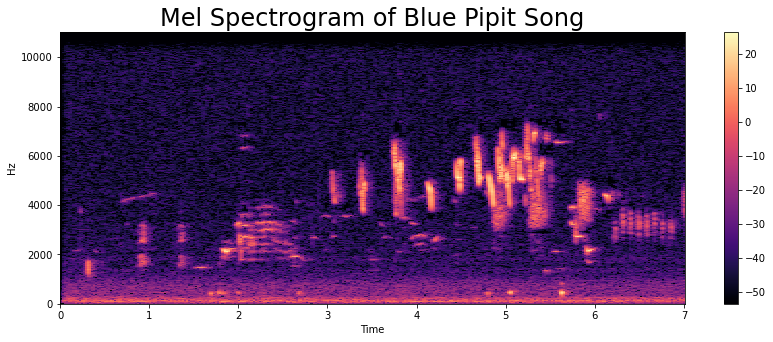

In [4]:
BP_405548='All Birds WAV/Rose-Crested-Blue-Pipit-405548.wav'

# Load the wav file
signal, sr = librosa.load(BP_405548,duration=7) # sr = sampling rate

stft = librosa.stft(signal)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 5))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Mel Spectrogram of Blue Pipit Song', fontsize=24)
plt.savefig("MelSpecBPSong.png")
plt.show()


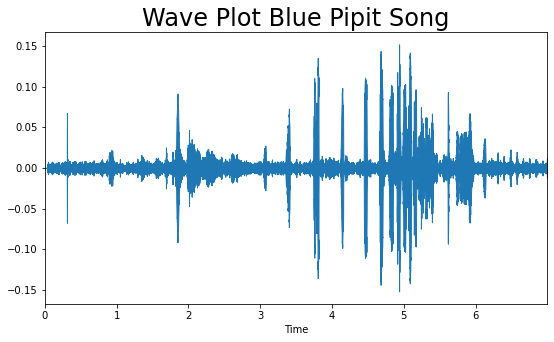

In [5]:
BP_14877='All Birds WAV/Rose-Crested-Blue-Pipit-405548.wav'

# Load the wav file with Librosa
signal, sr = librosa.load(BP_14877,duration=7) # sr = sampling rate
plt.figure(figsize=(9, 5))
librosa.display.waveplot(signal, sr=sr)

plt.title('Wave Plot Blue Pipit Song', fontsize=24)
plt.savefig("WavePlotBPSong.png")
plt.show()


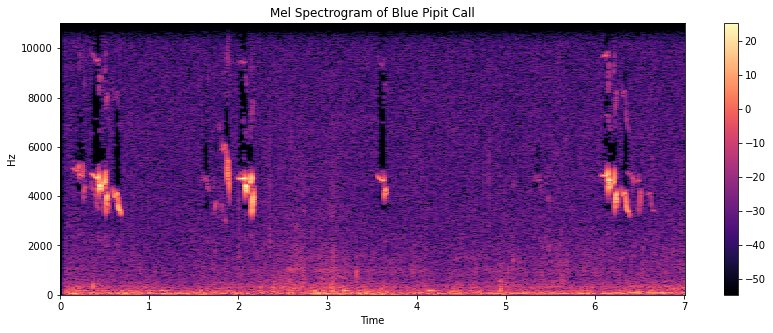

In [6]:
BP_35964='All Birds WAV/Rose-Crested-Blue-Pipit-35964.wav'

# Load the wav file
signal, sr = librosa.load(BP_35964,duration=7) # sr = sampling rate

stft = librosa.stft(signal)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 5))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Mel Spectrogram of Blue Pipit Call')
plt.savefig("MelSpecBPCall.png")
plt.show()


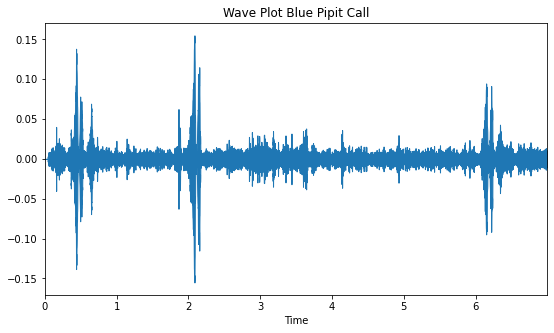

In [7]:
plt.figure(figsize=(9, 5))
librosa.display.waveplot(signal, sr=sr)
plt.title('Wave Plot Blue Pipit Call')
plt.savefig("WavePlotBPCall.png")
plt.show()


In [8]:
gc.collect()

32775

In [9]:
# Just RCBP A quality Songs
bp_songs = birds.loc[(birds['English_name'] == 'Rose-Crested-Blue-Pipit') 
                     & (birds['Vocalization_type'] == 'song') 
                     & (birds['Quality'] == 'A') ]

bp_calls = birds.loc[(birds['English_name'] == 'Rose-Crested-Blue-Pipit') 
                     & (birds['Vocalization_type'] == 'call') 
                     & (birds['Quality'] == 'A') ]

In [10]:
bp_songs

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y,mp3_path,wav_path
3,405548,Rose-Crested-Blue-Pipit,song,A,11:00,3/10/2018,55,125,All Birds/Rose-Crested-Blue-Pipit-405548.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-405548.wav
4,401782,Rose-Crested-Blue-Pipit,song,A,6:00,6/29/2008,129,123,All Birds/Rose-Crested-Blue-Pipit-401782.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-401782.wav
8,377874,Rose-Crested-Blue-Pipit,song,A,7:43,6/11/2000,134,118,All Birds/Rose-Crested-Blue-Pipit-377874.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-377874.wav
11,364567,Rose-Crested-Blue-Pipit,song,A,7:00,4/14/2017,124,121,All Birds/Rose-Crested-Blue-Pipit-364567.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-364567.wav
17,293914,Rose-Crested-Blue-Pipit,song,A,7:19,6/5/2015,142,114,All Birds/Rose-Crested-Blue-Pipit-293914.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-293914.wav
18,277989,Rose-Crested-Blue-Pipit,song,A,20:31,5/26/2015,159,117,All Birds/Rose-Crested-Blue-Pipit-277989.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-277989.wav
19,277952,Rose-Crested-Blue-Pipit,song,A,15:34,5/26/2015,128,116,All Birds/Rose-Crested-Blue-Pipit-277952.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-277952.wav
23,176636,Rose-Crested-Blue-Pipit,song,A,7:40,6/6/2013,121,132,All Birds/Rose-Crested-Blue-Pipit-176636.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-176636.wav
24,164501,Rose-Crested-Blue-Pipit,song,A,17:30,5/3/1993,131,120,All Birds/Rose-Crested-Blue-Pipit-164501.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-164501.wav
25,164204,Rose-Crested-Blue-Pipit,song,A,6:00,4/30/2012,151,154,All Birds/Rose-Crested-Blue-Pipit-164204.mp3,All Birds WAV/Rose-Crested-Blue-Pipit-164204.wav


In [11]:
# Some functions for a big bunch of visualizations

def plot_signal_temp(df, title):
    fig = plt.figure(figsize=(22,48))
    fig.suptitle(title, fontsize=32)
    
    for i, (index, obs) in enumerate(df.iterrows()):
        
        # read wav file
        rate, data = wavfile.read(obs["wav_path"])

        times = np.arange(len(data))/float(rate)
        # title = '{} {}'.format(obs["English_name"], obs["Vocalization_type"])
        
        # plot the signal
        ax = fig.add_subplot(16, 3, i+1)
        times = np.arange(len(data))/float(rate)
        ax.fill_between(times, data, color="C{}".format(i))
        ax.set_xlabel('Time [sec]')
        ax.set_ylabel('Amplitude')
        ax.set_xlim(0, 20)
        ax.set_ylim(-10000, 10000)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    saveName = title + "1.png"
    fig.savefig(saveName)
    
    
def plot_spectrogram(df, title):
    fig = plt.figure(figsize=(22,48))
    fig.suptitle(title, fontsize=32)
    
    for i, (index, obs) in enumerate(df.iterrows()):
        
        # read wav file
        rate, data = wavfile.read(obs["wav_path"])

        times = np.arange(len(data))/float(rate)
        # title = '{} {}'.format(obs["English_name"], obs["Vocalization_type"])

        # plot the spectrogram
        ax = fig.add_subplot(16, 3, i+1)
        ax.specgram(data, Fs=rate)
        ax.set_xlabel('Time [sec]')
        ax.set_ylabel('Frequency [Hz]')
        ax.set_xlim(0, 20)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    saveName = title + "2.png"
    fig.savefig(saveName)

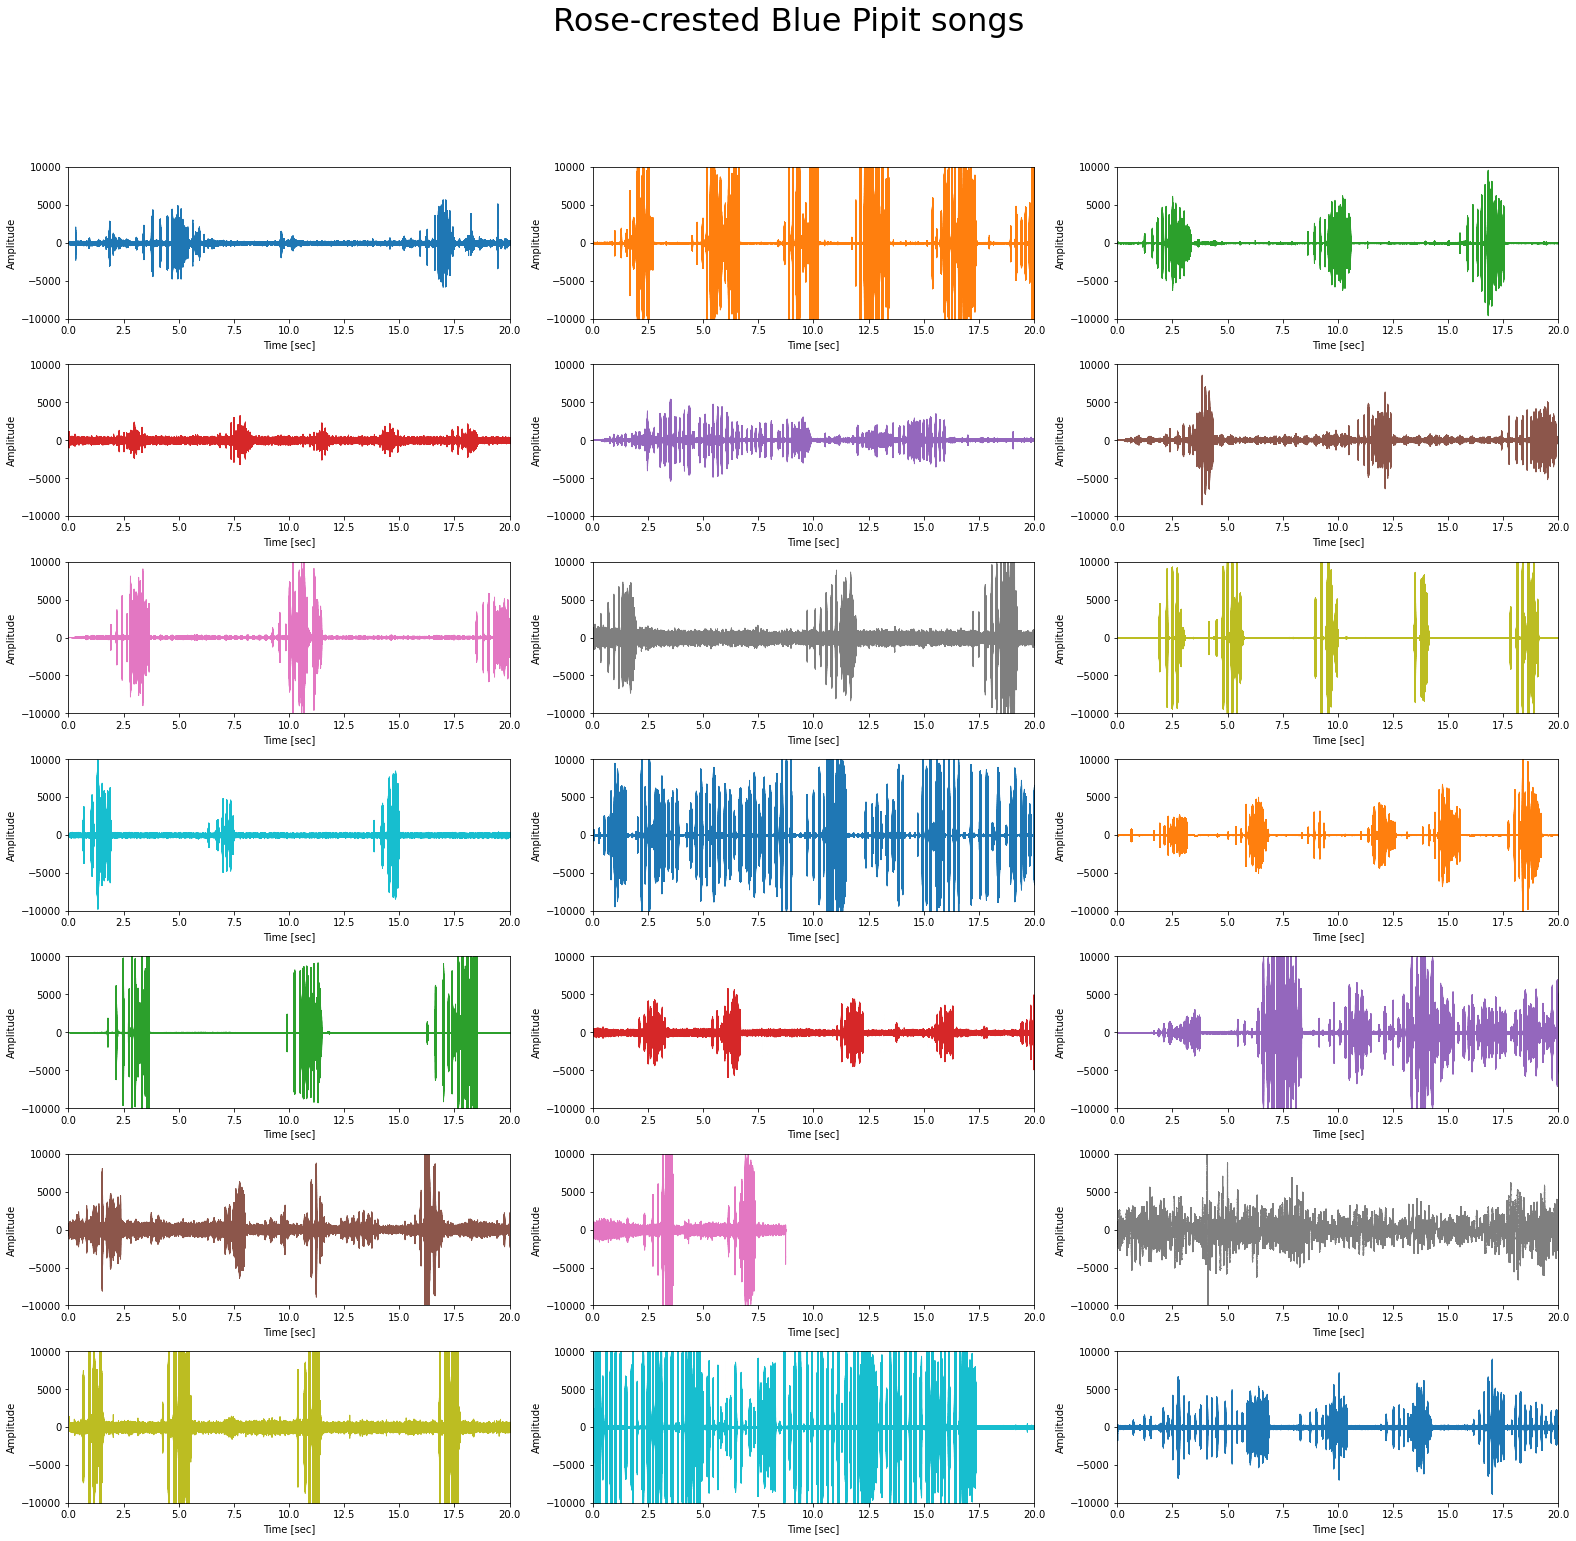

In [12]:
plot_signal_temp(bp_songs, 
                 title='Rose-crested Blue Pipit songs')

/Users/pauloleary/opt/miniconda3/envs/CAP_env/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


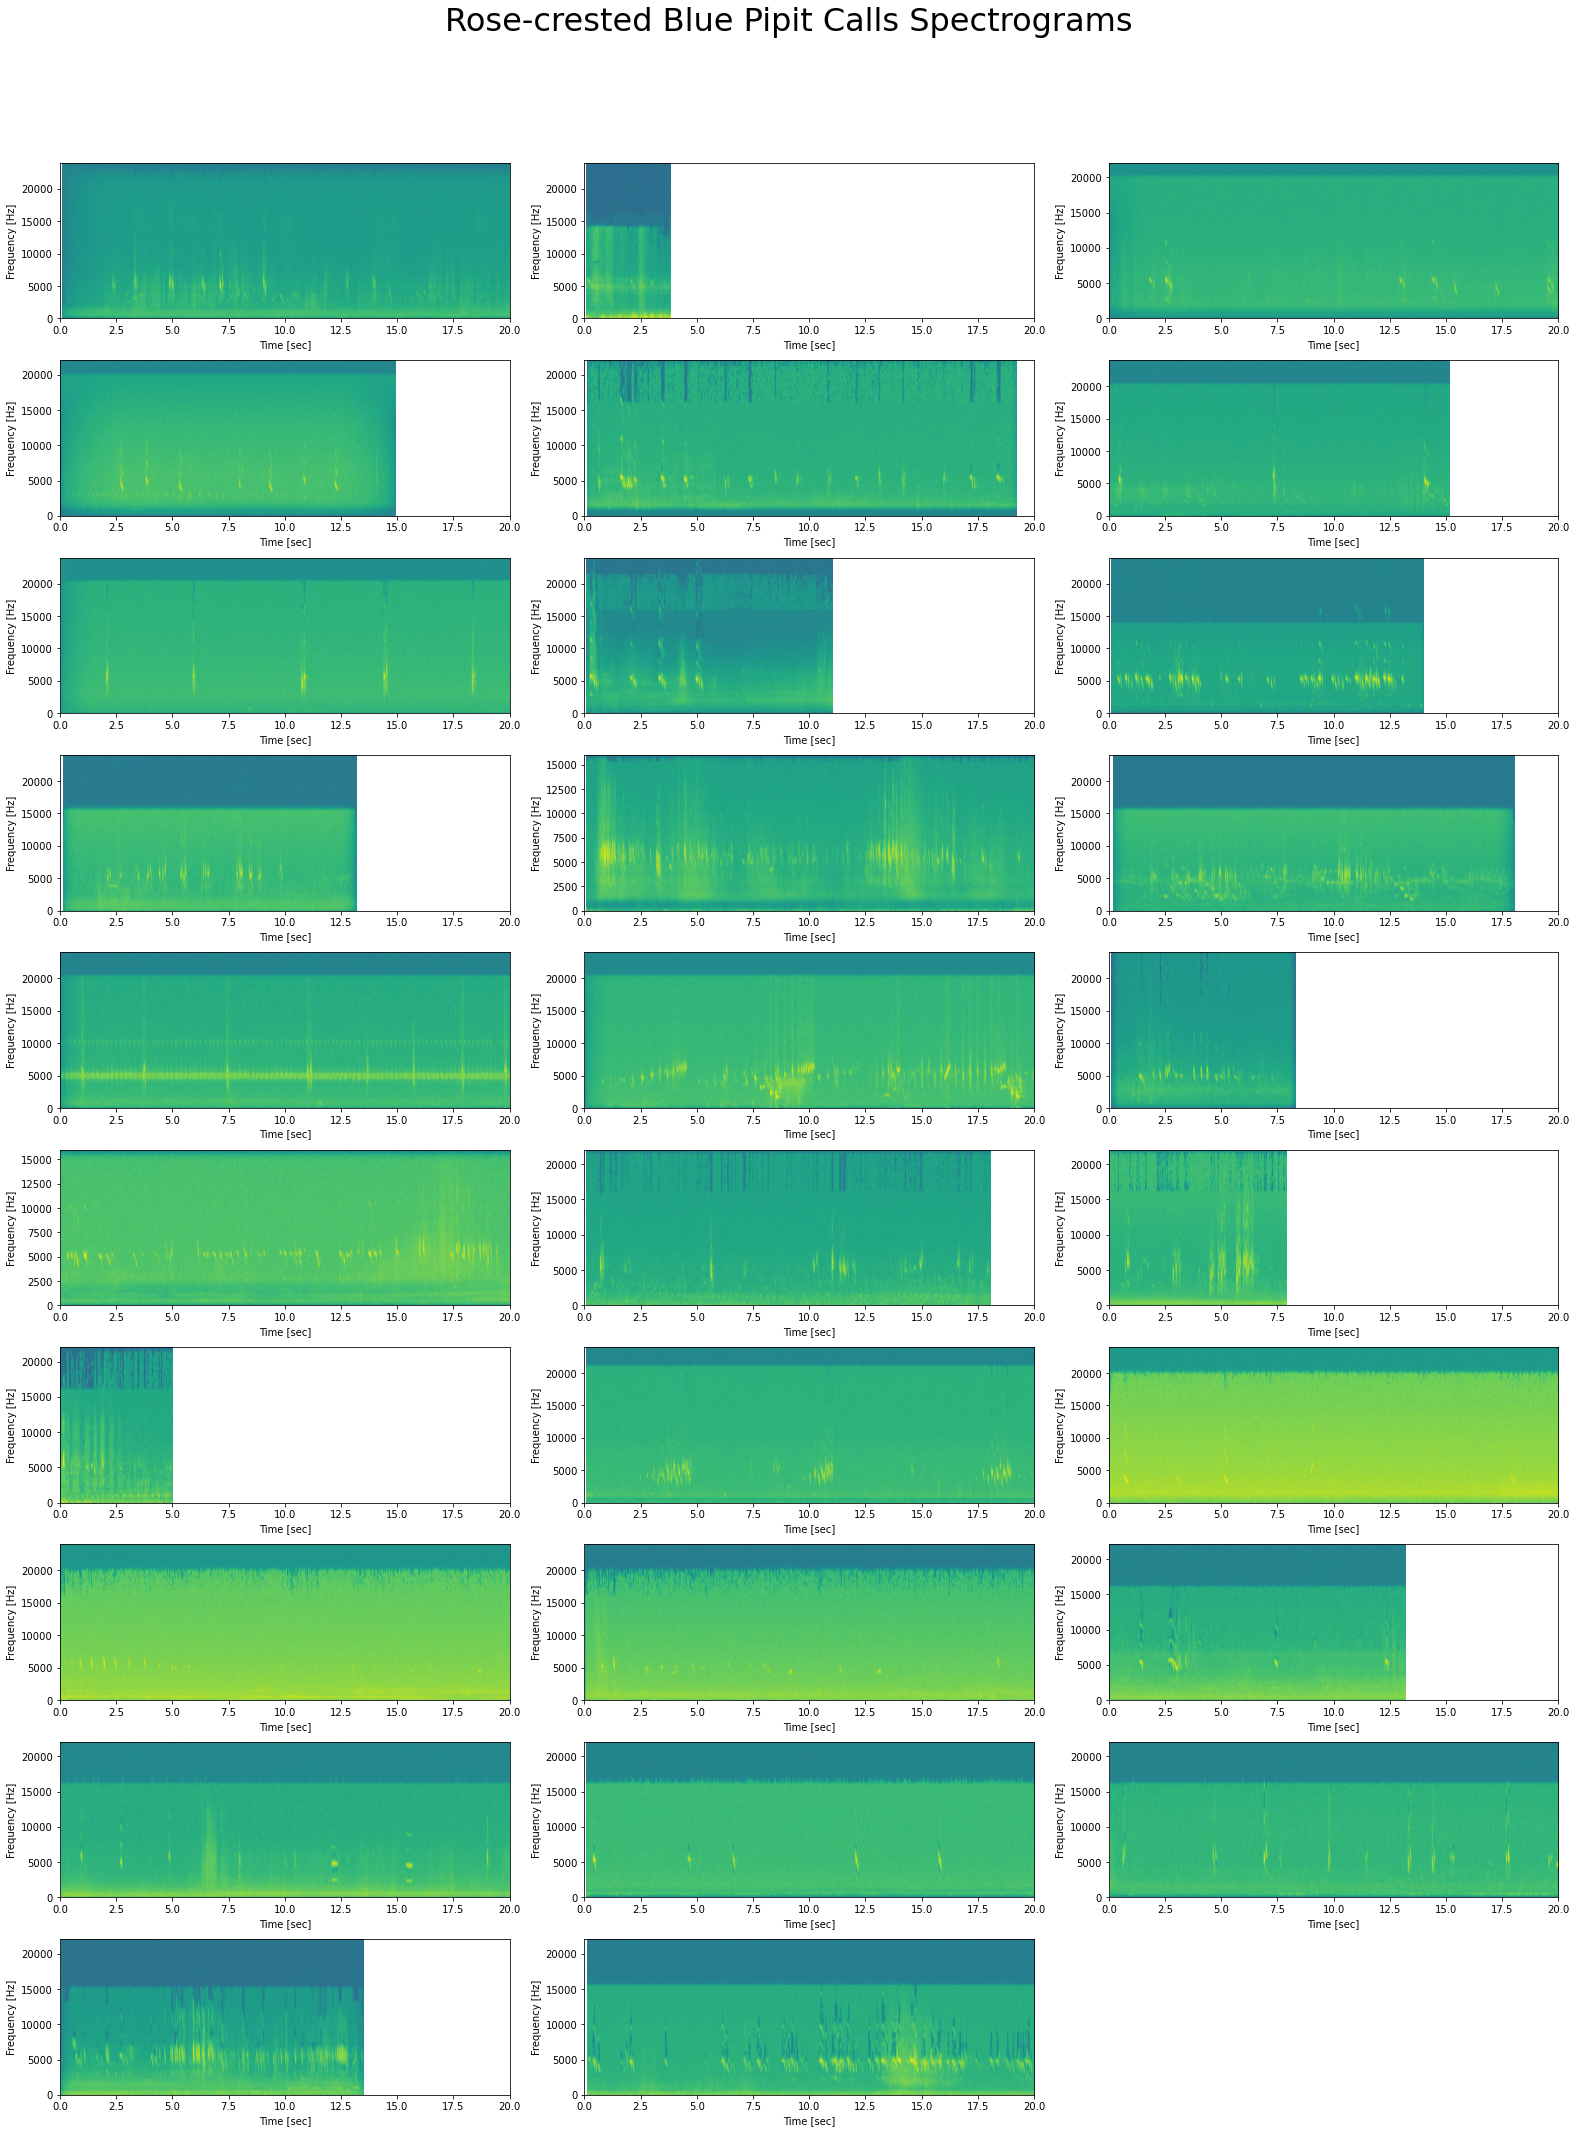

In [13]:
plot_spectrogram(bp_calls, 
                 title='Rose-crested Blue Pipit Calls Spectrograms')

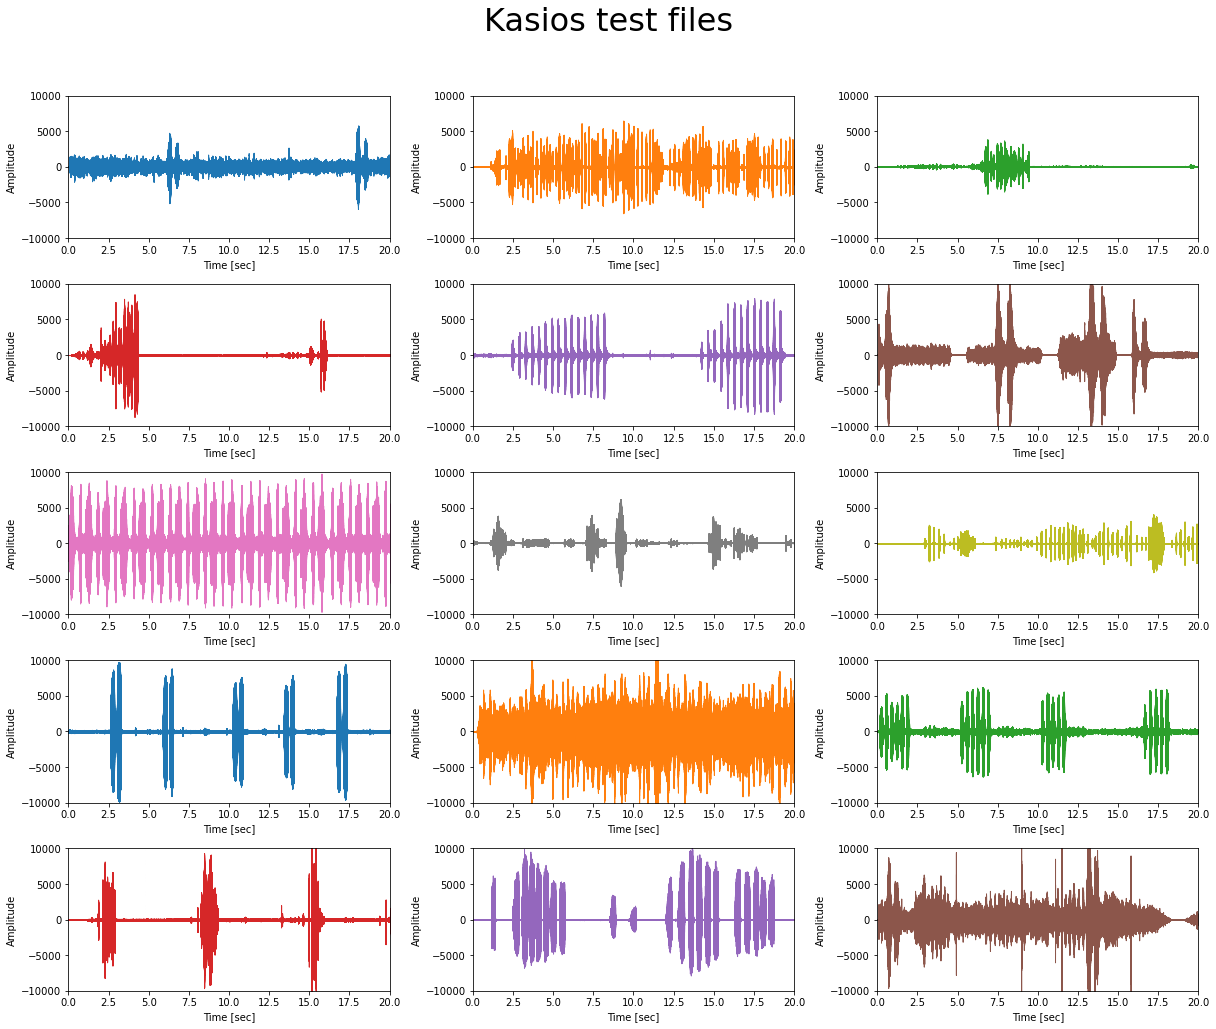

In [14]:
# Get all tests sounds of Kasios
fig = plt.figure(figsize=(17,15))
fig.suptitle('Kasios test files', fontsize=32)

for i, (index, obs) in enumerate(testBirds.iterrows()):
    # read wav file
    rate, data = wavfile.read(obs["wav_path"])
    
    # plot the signal
    ax = fig.add_subplot(5, 3, i+1)
    times = np.arange(len(data))/float(rate)
    ax.fill_between(times, data, color="C{}".format(i%9))
    ax.set_xlabel('Time [sec]')
    ax.set_ylabel('Amplitude')
    ax.set_xlim(0, 20)
    ax.set_ylim(-10000, 10000)
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

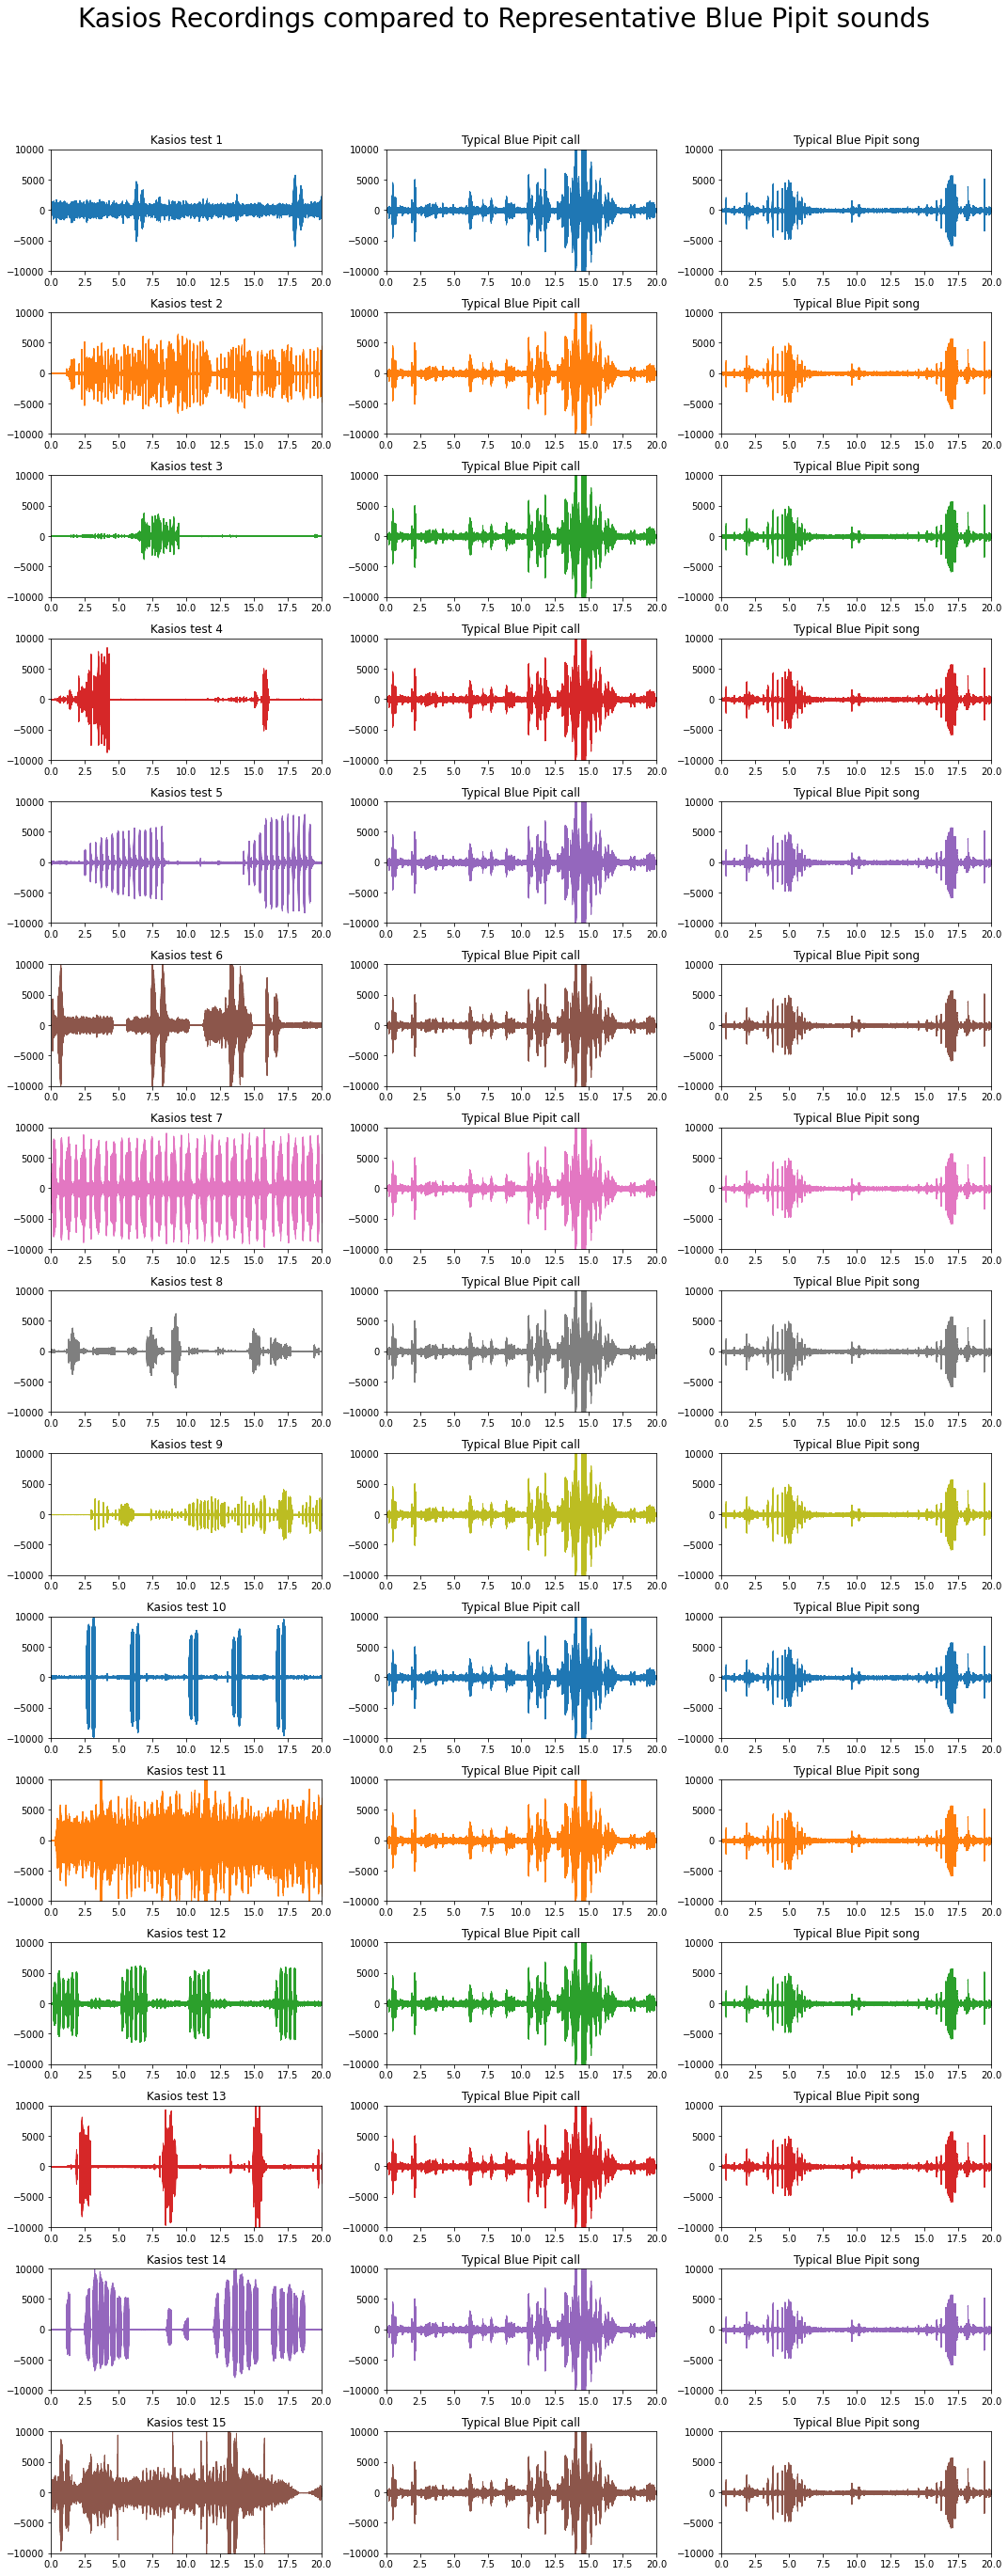

In [15]:
# To compare the Kasios test files to a representative Blue Pipit song and call visually
# Obviously, it is impossible to match things strictly visually.

fig = plt.figure(figsize=(15,40))
fig.suptitle('Kasios Recordings compared to Representative Blue Pipit sounds', fontsize=28)

# Read in a specific Blue Pipit Song and Call
f = birds.loc[birds["File ID"] == 35964].wav_path.item()
rate_calls, data_calls = wavfile.read(f)
f = birds.loc[birds["File ID"] == 405548].wav_path.item()
rate_songs, data_songs = wavfile.read(f)


for i, (index, obs) in enumerate(testBirds.iterrows()):
    # read wav file
    rate, data = wavfile.read(obs["wav_path"])
        
    # visualize the signals 
    ax = fig.add_subplot(15, 3, 3*i+1)
    times = np.arange(len(data))/float(rate)
    title = 'Kasios test {}'.format(i+1)
    ax.fill_between(times, data, color="C{}".format(i%9))
    ax.set_title(title)
    ax.set_xlim(0, 20)
    ax.set_ylim(-10000, 10000)
    
    bx = fig.add_subplot(15, 3, 3*i+2)
    times = np.arange(len(data_calls))/float(rate_calls)
    bx.fill_between(times, data_calls, color="C{}".format(i%9))
    bx.set_title('Typical Blue Pipit call')
    bx.set_xlim(0, 20)
    bx.set_ylim(-10000, 10000)
    
    cx = fig.add_subplot(15, 3, 3*i+3)
    times = np.arange(len(data_songs))/float(rate_songs)
    cx.fill_between(times, data_songs, color="C{}".format(i%9))
    cx.set_title('Typical Blue Pipit song')
    cx.set_xlim(0, 20)
    cx.set_ylim(-10000, 10000)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])


In [16]:
fig.savefig("CompTestActual.png")

In [17]:
import gc

In [18]:
gc.collect()

45